Read CSV file 

In [1]:
import pandas as pd
import numpy as np
import sqlite3

#Read CSV file
restaurant_df = pd.read_csv('restaurant_info.csv')
orders_df = pd.read_csv('Orders.csv')

In [2]:
# Change column name to remove spaces for compatibility with sql databse

restaurant_df.columns = restaurant_df.columns.str.replace(' ', '_')
orders_df.columns = orders_df.columns.str.replace(' ', '_')
orders_df.columns = orders_df.columns.str.replace('-', '_')

print(restaurant_df.head())
print(orders_df.head())


   RestaurantID     RestaurantName       Cuisine    Zone  Category  Store  \
0             1     The Cave Hotel   Continental  Zone B       Pro      1   
1             2          SSK Hotel  North Indian  Zone D       Pro      2   
2             3     ASR Restaurant  South Indian  Zone D  Ordinary      3   
3             4          Win Hotel  South Indian  Zone D  Ordinary      4   
4             5  Denver Restaurant   Continental  Zone D       Pro      5   

           Manager  Years_as_manager                       Email  \
0     Esther Hosea               2.0     estherhosea@example.org   
1     Dolores Dome              15.0     doloresdome@example.net   
2  Jacquline Segal               9.0  jacqulinesegal@example.org   
3    Anne Mckinley               1.0    annemckinley@example.net   
4  Francisco Doxey              14.0  franciscodoxey@example.net   

                                   Address  
0      4971 Janet Court;Livermore;CA;94550  
1      29 Vista Flores;Pleasanton;CA;9

Cleaning Restaurant_info CSV file

In [3]:
# Renaming Restaurant_ID column from restaurant csv for column name consistency
restaurant_df = restaurant_df.rename(columns={'RestaurantID': 'Restaurant_ID'})

In [4]:
# Changing column name RestaurantName
restaurant_df = restaurant_df.rename(columns={'RestaurantName': 'Restaurant_Name'})

In [5]:
# Changing column name Manager
restaurant_df = restaurant_df.rename(columns={'Manager': 'Manager_Name'})

In [6]:
print(restaurant_df.head())

   Restaurant_ID    Restaurant_Name       Cuisine    Zone  Category  Store  \
0              1     The Cave Hotel   Continental  Zone B       Pro      1   
1              2          SSK Hotel  North Indian  Zone D       Pro      2   
2              3     ASR Restaurant  South Indian  Zone D  Ordinary      3   
3              4          Win Hotel  South Indian  Zone D  Ordinary      4   
4              5  Denver Restaurant   Continental  Zone D       Pro      5   

      Manager_Name  Years_as_manager                       Email  \
0     Esther Hosea               2.0     estherhosea@example.org   
1     Dolores Dome              15.0     doloresdome@example.net   
2  Jacquline Segal               9.0  jacqulinesegal@example.org   
3    Anne Mckinley               1.0    annemckinley@example.net   
4  Francisco Doxey              14.0  franciscodoxey@example.net   

                                   Address  
0      4971 Janet Court;Livermore;CA;94550  
1      29 Vista Flores;Pleasanto

In [7]:
# Get the list of columns with missing values
columns_with_na = restaurant_df.columns[restaurant_df.isnull().any()].tolist()

# Print the result
print("Columns with missing values:", columns_with_na)

Columns with missing values: ['Manager_Name', 'Years_as_manager', 'Email']


In [10]:
# Initialize the 'Manager_ID' column if it doesn't exist
if 'Manager_ID' not in restaurant_df.columns:
    restaurant_df['Manager_ID'] = range(1, len(restaurant_df) + 1)


In [11]:
#Add Location_ID in restaurant CSV based on Zone

restaurant_df['Location_ID'] = pd.factorize(restaurant_df['Zone'])[0] + 1

In [12]:
print(restaurant_df)

    Restaurant_ID    Restaurant_Name       Cuisine    Zone  Category  Store  \
0               1     The Cave Hotel   Continental  Zone B       Pro      1   
1               2          SSK Hotel  North Indian  Zone D       Pro      2   
2               3     ASR Restaurant  South Indian  Zone D  Ordinary      3   
3               4          Win Hotel  South Indian  Zone D  Ordinary      4   
4               5  Denver Restaurant   Continental  Zone D       Pro      5   
5               6            Willies        French  Zone D       Pro      6   
6               7                AMN  North Indian  Zone D  Ordinary      7   
7               8               Oslo        French  Zone B  Ordinary      8   
8               9   Excel Restaurant  North Indian  Zone D  Ordinary      9   
9              10         Dave Hotel  South Indian  Zone A  Ordinary     10   
10             11          The Taste        French  Zone B       Pro     11   
11             12              Ruchi       Chinese  

In [13]:
## Handling missing 'Year_as_manager'


#Calculating mean Age
mean_age = restaurant_df["Years_as_manager"].mean()

# Round the mean to the desired number of decimal places
rounded_mean_age = round(mean_age, 0)  # Adjust the number of decimal places as needed
rounded_mean_age


9.0

In [14]:
#Replacing Missing value with Mean age
restaurant_df.loc[14, 'Years_as_manager'] = rounded_mean_age

#Replace value with 0 in misisng value of `Year_as_manager` for missing `Manager`
restaurant_df.loc[7, 'Years_as_manager'] = 0
print(restaurant_df)

    Restaurant_ID    Restaurant_Name       Cuisine    Zone  Category  Store  \
0               1     The Cave Hotel   Continental  Zone B       Pro      1   
1               2          SSK Hotel  North Indian  Zone D       Pro      2   
2               3     ASR Restaurant  South Indian  Zone D  Ordinary      3   
3               4          Win Hotel  South Indian  Zone D  Ordinary      4   
4               5  Denver Restaurant   Continental  Zone D       Pro      5   
5               6            Willies        French  Zone D       Pro      6   
6               7                AMN  North Indian  Zone D  Ordinary      7   
7               8               Oslo        French  Zone B  Ordinary      8   
8               9   Excel Restaurant  North Indian  Zone D  Ordinary      9   
9              10         Dave Hotel  South Indian  Zone A  Ordinary     10   
10             11          The Taste        French  Zone B       Pro     11   
11             12              Ruchi       Chinese  

In [15]:
#Separate address
address_parts = restaurant_df['Address'].str.split(';', expand=True)

# Rename columns
address_parts.columns = ['Street', 'City', 'State', 'ZIP']

# Concatenate the new columns with the original DataFrame
restaurant_df= pd.concat([restaurant_df, address_parts], axis=1)

print(restaurant_df)

    Restaurant_ID    Restaurant_Name       Cuisine    Zone  Category  Store  \
0               1     The Cave Hotel   Continental  Zone B       Pro      1   
1               2          SSK Hotel  North Indian  Zone D       Pro      2   
2               3     ASR Restaurant  South Indian  Zone D  Ordinary      3   
3               4          Win Hotel  South Indian  Zone D  Ordinary      4   
4               5  Denver Restaurant   Continental  Zone D       Pro      5   
5               6            Willies        French  Zone D       Pro      6   
6               7                AMN  North Indian  Zone D  Ordinary      7   
7               8               Oslo        French  Zone B  Ordinary      8   
8               9   Excel Restaurant  North Indian  Zone D  Ordinary      9   
9              10         Dave Hotel  South Indian  Zone A  Ordinary     10   
10             11          The Taste        French  Zone B       Pro     11   
11             12              Ruchi       Chinese  

In [16]:
#Replace missing value in State and ZIP with actual state and ZIP
restaurant_df.loc[18, 'State'] = 'CA'
restaurant_df.loc[18, 'ZIP'] = 94536
print(restaurant_df)

    Restaurant_ID    Restaurant_Name       Cuisine    Zone  Category  Store  \
0               1     The Cave Hotel   Continental  Zone B       Pro      1   
1               2          SSK Hotel  North Indian  Zone D       Pro      2   
2               3     ASR Restaurant  South Indian  Zone D  Ordinary      3   
3               4          Win Hotel  South Indian  Zone D  Ordinary      4   
4               5  Denver Restaurant   Continental  Zone D       Pro      5   
5               6            Willies        French  Zone D       Pro      6   
6               7                AMN  North Indian  Zone D  Ordinary      7   
7               8               Oslo        French  Zone B  Ordinary      8   
8               9   Excel Restaurant  North Indian  Zone D  Ordinary      9   
9              10         Dave Hotel  South Indian  Zone A  Ordinary     10   
10             11          The Taste        French  Zone B       Pro     11   
11             12              Ruchi       Chinese  

Cleaning Orders CSV file

In [17]:
# Changing column name 'Delivery_Time_Taken_(mins)'
orders_df = orders_df.rename(columns={'Delivery_Time_Taken_(mins)': 'Delivery_Time_Taken_Mins'})


In [18]:
# Get the list of columns with missing values
columns_with_na = orders_df.columns[orders_df.isnull().any()].tolist()

# Print the result
print("Columns with missing values:", columns_with_na)


Columns with missing values: ['Order_ID', 'First_Customer_Name', 'Quantity_of_Items', 'Payment_Mode', 'Credit_Card', 'Debit_Card', 'Card_provider']


In [19]:
#Add customerid in restuarnat CSV
orders_df['Customer_ID'] = pd.factorize(orders_df['First_Customer_Name'] + orders_df['Last_Customer_Name'])[0] + 1
print(orders_df.head())

  Order_ID First_Customer_Name  Restaurant_ID           Order_Date  \
0      OD1               Srini              6  2022-01-01 23:15:00   
1      OD2             Revandh             13  2022-01-01 19:21:00   
2      OD3               David              9  2022-01-01 23:15:00   
3      OD4               Selva              4  2022-01-01 20:31:00   
4      OD5               Vinny              4  2022-01-01 11:10:00   

   Quantity_of_Items  Order_Amount      Payment_Mode  \
0                5.0           633        Debit Card   
1                5.0           258       Credit Card   
2                7.0           594  Cash on Delivery   
3                5.0           868  Cash on Delivery   
4                4.0           170        Debit Card   

   Delivery_Time_Taken_Mins  Customer_Rating_Food  Customer_Rating_Delivery  \
0                        47                     5                         3   
1                        41                     3                         5   
2    

In [20]:
#Handling missing first_name
orders_df['First_Customer_Name'].fillna(orders_df.groupby(['Last_Customer_Name', 'Credit_Card'])['First_Customer_Name'].transform('first'), inplace=True)


In [21]:
# Check for missing values in the 'First_Name' column
missing_values = orders_df['First_Customer_Name'].isnull().sum()

# Print the result
print("Number of missing values in 'First_Name' column:", missing_values)

Number of missing values in 'First_Name' column: 0


In [22]:
#Handling Missing Order ID

# Find the missing row number(s)
missing_rows = orders_df[orders_df['Order_ID'].isnull()].index

# Fill in missing Order IDs based on row number with "OD" prefix
orders_df.loc[missing_rows, 'Order_ID'] = 'OD' + (missing_rows + 1).astype(str)

In [23]:
# Check for missing values in the ORDERID column
missing_values = orders_df['Order_ID'].isnull().sum()

# Print the result
print("Number of missing values in 'Order_ID' column:", missing_values)

Number of missing values in 'Order_ID' column: 0


In [24]:
missing_values = orders_df["Quantity_of_Items"].isnull().sum()
print(f"Number of missing values in Quantity_of_Items: {missing_values}")


Number of missing values in Quantity_of_Items: 2


In [25]:

# Handling missing quantity
if missing_values > 0 and "Quantity_of_Items" in orders_df.columns:
    mean_qty = orders_df["Quantity_of_Items"].mean()
    rounded_mean_qty = round(mean_qty, 0)  # Adjust the number of decimal places as needed
    orders_df["Quantity_of_Items"].fillna(rounded_mean_qty, inplace=True)


In [26]:
# Identify negative values in all columns
negative_values = orders_df['Delivery_Time_Taken_Mins'] < 0

# Display rows with negative values
print("Rows with negative values in 'Delivery_Time_Taken_Mins' column:")
print(orders_df[negative_values])

Rows with negative values in 'Delivery_Time_Taken_Mins' column:
    Order_ID First_Customer_Name  Restaurant_ID           Order_Date  \
445    OD446                 Ram             14  2022-01-01 19:21:00   

     Quantity_of_Items  Order_Amount Payment_Mode  Delivery_Time_Taken_Mins  \
445                3.0           634  Credit Card                       -11   

     Customer_Rating_Food  Customer_Rating_Delivery   Credit_Card  Debit_Card  \
445                     4                         1  4.636655e+18         NaN   

     Card_provider Last_Customer_Name  Customer_ID  
445  VISA 19 digit             Martin           21  


In [27]:
#Calculate Mean Delivery Time

#Calculating mean Age
mean_deliverytime = orders_df['Delivery_Time_Taken_Mins'].mean()

# Round the mean to the desired number of decimal places
rounded_mean_deliverytime = round(mean_deliverytime, 0)  # Adjust the number of decimal places as needed
rounded_mean_deliverytime


30.0

In [28]:
# Replace negative value with mean value
orders_df.loc[445, 'Delivery_Time_Taken_Mins'] = 30
orders_df.iloc[445]

Order_ID                                    OD446
First_Customer_Name                           Ram
Restaurant_ID                                  14
Order_Date                    2022-01-01 19:21:00
Quantity_of_Items                             3.0
Order_Amount                                  634
Payment_Mode                          Credit Card
Delivery_Time_Taken_Mins                       30
Customer_Rating_Food                            4
Customer_Rating_Delivery                        1
Credit_Card                 4636654800757029888.0
Debit_Card                                    NaN
Card_provider                       VISA 19 digit
Last_Customer_Name                         Martin
Customer_ID                                    21
Name: 445, dtype: object

In [29]:
# Fill missing value in 'payment mode' column based on 'credit_card' and 'debit_card'
orders_df['Payment_Mode'] = np.where(orders_df['Credit_Card'].notnull(), 'Credit Card',
                               np.where(orders_df['Debit_Card'].notnull(), 'Debit Card', 'Cash on Delivery'))

In [30]:
#create paymentid in orders table
orders_df.insert(6, 'Payment_ID', range(1, 1 + len(orders_df)))

In [31]:
# Add CustomerRating ID
orders_df['CustomerRating_ID'] = range(1, len(orders_df) + 1)

In [32]:
print(orders_df.head())

  Order_ID First_Customer_Name  Restaurant_ID           Order_Date  \
0      OD1               Srini              6  2022-01-01 23:15:00   
1      OD2             Revandh             13  2022-01-01 19:21:00   
2      OD3               David              9  2022-01-01 23:15:00   
3      OD4               Selva              4  2022-01-01 20:31:00   
4      OD5               Vinny              4  2022-01-01 11:10:00   

   Quantity_of_Items  Order_Amount  Payment_ID      Payment_Mode  \
0                5.0           633           1        Debit Card   
1                5.0           258           2       Credit Card   
2                7.0           594           3  Cash on Delivery   
3                5.0           868           4  Cash on Delivery   
4                4.0           170           5        Debit Card   

   Delivery_Time_Taken_Mins  Customer_Rating_Food  Customer_Rating_Delivery  \
0                        47                     5                         3   
1           

In [33]:
# Creating data frame for entities
location_df= restaurant_df[['Location_ID','Zone']]
restaurantInfo_df= restaurant_df[['Restaurant_ID','Restaurant_Name','Cuisine','Category','Street',
       'City', 'State', 'ZIP','Location_ID']]
manager_df= restaurant_df[['Manager_ID','Restaurant_ID','Manager_Name','Years_as_manager','Email']]
payment_df = orders_df [['Payment_ID', 'Credit_Card','Debit_Card','Card_provider','Payment_Mode','Customer_ID','Order_ID']]
customer_df= orders_df[['Customer_ID','First_Customer_Name','Last_Customer_Name']]
orderdetails_df= orders_df[['Order_ID','Customer_ID','Restaurant_ID','Order_Date','Quantity_of_Items','Order_Amount','Delivery_Time_Taken_Mins']]
customerrating_df=orders_df[['CustomerRating_ID','Customer_ID','Order_ID','Customer_Rating_Food','Customer_Rating_Delivery']]

In [34]:
# Checking Duplicate value
customer_df["Customer_ID"].duplicated().sum()


478

In [35]:
#Create copy to remove duplicate
customer_df_copy = customer_df.copy()
customer_df_copy.drop_duplicates(subset="Customer_ID", keep="first", inplace=True)


In [36]:
# Checking Duplicate value
location_df["Location_ID"].duplicated().sum()

16

In [37]:
#Create copy to remove duplicate
location_df_copy = location_df.copy()
location_df_copy.drop_duplicates(subset="Location_ID", keep="first", inplace=True)

In [38]:

print(location_df_copy)

    Location_ID    Zone
0             1  Zone B
1             2  Zone D
9             3  Zone A
15            4  Zone C


In [39]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('Coursework_10891326.db')
cursor = conn.cursor()


# Drop if Exists & Create Location table
cursor.execute('DROP TABLE IF EXISTS Location;')
cursor.execute('''
    CREATE TABLE Location (
        Location_ID INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        Zone VARCHAR(15) NOT NULL
    );
''')

# Drop if Exists & Create RestaurantInfo table
cursor.execute('DROP TABLE IF EXISTS RestaurantInfo;')
cursor.execute('''
    CREATE TABLE RestaurantInfo (
        Restaurant_ID INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        Restaurant_Name VARCHAR(50) NOT NULL,
        Cuisine VARCHAR(25) NOT NULL,
        Category VARCHAR(25) NOT NULL,
        Location_ID INTEGER NOT NULL,
        Street VARCHAR(50),
        City VARCHAR(25),
        State VARCHAR(2),
        ZIP VARCHAR(5),
        FOREIGN KEY (Location_ID) REFERENCES  Location (Location_ID) ON UPDATE CASCADE
    );
''')


# Drop if Exists & Create Manager table
cursor.execute('DROP TABLE IF EXISTS Manager;')
cursor.execute('''
    CREATE TABLE Manager (
        Manager_ID INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        Manager_Name VARCHAR(50) DEFAULT NULL,
        Years_as_Manager SMALLINT DEFAULT NULL,
        Email VARCHAR(50) DEFAULT NULL,
        Restaurant_ID INTEGER NOT NULL,
        FOREIGN KEY (Restaurant_ID) REFERENCES RestaurantInfo (Restaurant_ID) ON UPDATE CASCADE
    );
''')


# Drop if Exists & Create Customer table
cursor.execute('DROP TABLE IF EXISTS Customer;')
cursor.execute('''
   CREATE TABLE Customer (
        Customer_ID INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        First_Customer_Name VARCHAR(50),
        Last_Customer_Name VARCHAR(50)
    );
''')

# Drop if Exists & Create Payment table
cursor.execute('DROP TABLE IF EXISTS Payment;')
cursor.execute('''
    CREATE TABLE Payment (
        Payment_ID INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        Credit_Card VARCHAR(19) DEFAULT NULL,
        Debit_Card VARCHAR(19) DEFAULT NULL,
        Card_Provider VARCHAR(50) DEFAULT NULL,
        Payment_Mode VARCHAR(25) NOT NULL,
        Customer_ID INTEGER NOT NULL,
        Order_ID VARCHAR(50) NOT NULL,
        FOREIGN KEY (Customer_ID) REFERENCES Customer (Customer_ID) ON UPDATE CASCADE,
        FOREIGN KEY (Order_ID) REFERENCES OrderDetails (Order_ID) ON UPDATE CASCADE
    );
''')

# Drop if Exists & Create OrderDetails table
cursor.execute('DROP TABLE IF EXISTS OrderDetails;')
cursor.execute('''
    CREATE TABLE OrderDetails (
        Order_ID VARCHAR(50) NOT NULL ,
        Customer_ID INTEGER NOT NULL,
        Restaurant_ID INTEGER NOT NULL,
        Order_Date DATETIME NOT NULL,
        Quantity_of_Items INTEGER,
        Order_Amount DECIMAL(10, 2) NOT NULL,
        Delivery_Time_Taken_Mins INTEGER NOT NULL,
        PRIMARY KEY (Order_ID),
        FOREIGN KEY (Customer_ID) REFERENCES Customer (Customer_ID) ON UPDATE CASCADE,
        FOREIGN KEY (Restaurant_ID) REFERENCES RestaurantInfo (Restaurant_ID) ON UPDATE CASCADE  
    );
''')


# Drop if Exists & Create CustomerRating table
cursor.execute('DROP TABLE IF EXISTS CustomerRating;')
cursor.execute('''
    CREATE TABLE CustomerRating (
        CustomerRating_ID INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        Customer_ID INTEGER NOT NULL, 
        Order_ID VARCHAR(50) NOT NULL,
        Customer_Rating_Food SMALLINT NOT NULL,
        Customer_Rating_Delivery SMALLINT NOT NULL,
        FOREIGN KEY (Customer_ID) REFERENCES Customer (Customer_ID),
        FOREIGN KEY (Order_ID) REFERENCES OrderDetails (Order_ID) ON UPDATE CASCADE
    );
''')



# Commit changes and close the connection
conn.commit()
conn.close()


GUI for Restaurant

In [40]:
from sqlalchemy import create_engine

# Define SQLite database connection
db_name = 'Coursework_10891326.db'
conn = sqlite3.connect(db_name)

# Create SQLAlchemy engine
engine = create_engine(f'sqlite:///{db_name}')

location_df_copy.to_sql('Location', con=engine, if_exists='append', index=False)


4

In [41]:
manager_df.to_sql('Manager', con=engine, if_exists='append', index=False)


20

In [42]:
payment_df.to_sql('Payment', con=engine, if_exists='append', index=False)


500

In [43]:
customer_df_copy.to_sql('Customer', con=engine, if_exists='append', index=False)


22

In [44]:
orderdetails_df.to_sql('OrderDetails', con=engine, if_exists='append', index=False)


500

In [45]:
customerrating_df.to_sql('CustomerRating', con=engine, if_exists='append', index=False)

500

In [46]:
restaurantInfo_df.to_sql('RestaurantInfo', con=engine, if_exists='append', index=False)

20

In [47]:
print(restaurantInfo_df)

    Restaurant_ID    Restaurant_Name       Cuisine  Category  \
0               1     The Cave Hotel   Continental       Pro   
1               2          SSK Hotel  North Indian       Pro   
2               3     ASR Restaurant  South Indian  Ordinary   
3               4          Win Hotel  South Indian  Ordinary   
4               5  Denver Restaurant   Continental       Pro   
5               6            Willies        French       Pro   
6               7                AMN  North Indian  Ordinary   
7               8               Oslo        French  Ordinary   
8               9   Excel Restaurant  North Indian  Ordinary   
9              10         Dave Hotel  South Indian  Ordinary   
10             11          The Taste        French       Pro   
11             12              Ruchi       Chinese  Ordinary   
12             13    Veer Restaurant       Chinese  Ordinary   
13             14          KSR Hotel       Chinese       Pro   
14             15      Vrinda Bhavan  No

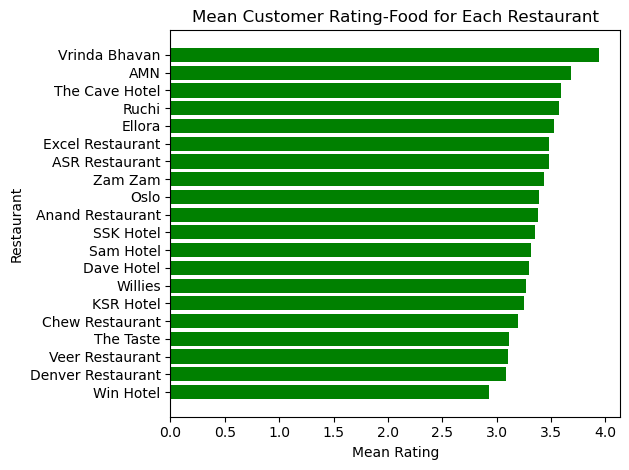

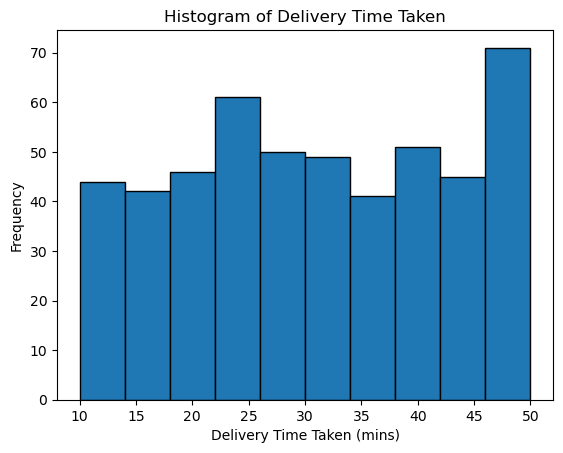

In [48]:
import sqlite3
import tkinter as tk
from tkinter import ttk, messagebox, simpledialog
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import re
import numpy as np

# Class definition for the RestaurantApp, representing the main application
class RestaurantApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Restaurant Management System")
        
        # Make the root window resizable
        self.root.resizable(width=True, height=True)

        # Create tabs
        self.tabs = ttk.Notebook(root)
        self.view_tab = ttk.Frame(self.tabs)
        self.edit_tab = ttk.Frame(self.tabs)
        self.performance_tab = ttk.Frame(self.tabs)

        # Add tabs to notebook
        self.tabs.add(self.view_tab, text="View Database")
        self.tabs.add(self.edit_tab, text="Update Database")
        self.tabs.add(self.performance_tab, text="Performance")
        self.tabs.pack(expand=1, fill="both")

        # Initialize database
        self.initialize_database()

        # View Database Tab
        self.create_view_tab()

        # Edit Database Tab
        self.create_edit_tab()

        # Performance Tab
        self.create_performance_tab()
        
    # Initialize the SQLite database connection and cursor
    def initialize_database(self):
        try:
            # Establish a connection to the SQLite database file (Coursework.10891326.db)
            self.conn = sqlite3.connect('Coursework_10891326.db')
            self.cursor = self.conn.cursor()  # Create a cursor to interact with the database

       # Handle database connection errors and print the error message
        except sqlite3.Error as e:
            print("Database Connection Error:", e)

    # Create the view tab in the GUI
    def create_view_tab(self):
        # Label for user instruction
        self.view_tab_label = tk.Label(self.view_tab, text="Select Table:")
        self.view_tab_label.grid(row=0, column=0, pady=10, padx=10)
        
        # Combobox to choose the table to view
        tables = ["Location", "RestaurantInfo", "Manager", "Customer", "OrderDetails", "Payment", "CustomerRating"]
        self.table_combobox = ttk.Combobox(self.view_tab, values=tables)
        self.table_combobox.grid(row=0, column=1, pady=10, padx=10)

        # Button to trigger the view_table method
        self.view_button = tk.Button(self.view_tab, text="View", command=self.view_table)
        self.view_button.grid(row=0, column=2, pady=10, padx=10)
        
        # Create a frame to contain the Treeview 
        view_frame = tk.Frame(self.view_tab)
        view_frame.grid(row=1, column=0, columnspan=5, pady=10, padx=10, sticky="nesw")
        
        # Allow the row and column to expand when the window is resized
        self.view_tab.grid_rowconfigure(1, weight=1)
        self.view_tab.grid_columnconfigure(0, weight=1)

        # Declare self.view_output 
        self.view_output = ttk.Treeview(self.view_tab)
        self.view_output["columns"] = ()
        self.view_output.grid(row=1, column=0, columnspan=5,pady=10, padx=10, sticky="nesw")
        

    # View data from the selected table in the GUI
    def view_table(self):
        table_name = self.table_combobox.get()
        query = f'SELECT * FROM {table_name};'
        print("SQL Query:", query)  # Add this line for debugging
        self.cursor.execute(query)
        rows = self.cursor.fetchall()

        # Clear existing columns and data
        self.view_output["columns"] = ()
        self.view_output.delete(*self.view_output.get_children())

        # Update columns based on the first row (if available)
        if rows:
            columns = [str(col[0]) for col in self.cursor.description]
            self.view_output["columns"] = columns
            for col in columns:
                self.view_output.heading(col, text=col)
                
        # Add rows to the Treeview
        for row in rows:
            self.view_output.insert("", "end", values=row)

        # Update the view after adding rows
        self.view_output.update_idletasks()
        
    # Create the 'Edit Database' tab in the GUI

    def create_edit_tab(self):
        # Label to instruct user to select Restaurant_ID
        self.edit_tab_label = tk.Label(self.edit_tab, text="Select Restaurant_ID:")
        self.edit_tab_label.grid(row=0, column=0, pady=10, padx=10)

        # Combobox to display Restaurant_ID options obtained from the database
        restaurant_ids = self.get_restaurant_ids()
        self.restaurant_combobox = ttk.Combobox(self.edit_tab, values=restaurant_ids)
        self.restaurant_combobox.grid(row=0, column=1, pady=10, padx=10)

        # Button to trigger the display of manager information
        self.display_button = tk.Button(self.edit_tab, text="Update Manager", command=self.display_manager_info)
        self.display_button.grid(row=0, column=2, pady=10, padx=10)

        # Treeview widget to display manager information in a tabular format
        self.edit_output = ttk.Treeview(self.edit_tab)
        self.edit_output["columns"] = ()
        self.edit_output.grid(row=1, column=0, columnspan=3, pady=10, padx=10)

    # Create edit buttons for manager information
    def create_edit_buttons(self, manager_info, columns, restaurant_id):
        # Create a frame to contain the edit buttons
        edit_buttons_frame = tk.Frame(self.edit_tab)
        edit_buttons_frame.grid(row=4, column=3, pady=5, padx=10, sticky="sw")
        # Generate edit buttons based on manager_info and associated columns
        edit_buttons = [
            tk.Button(self.edit_tab, text=f"Edit {info[0]}", command=lambda info=info, restaurant_id=restaurant_id: self.edit_manager_info(info, restaurant_id))
            for info in [("Manager_Name", manager_info[2]),
                         ("Years_as_manager", manager_info[3]), ("Email", manager_info[4])]
        ]

         # Place edit buttons in the grid within the frame
        for idx, button in enumerate(edit_buttons):
            button.grid(row=idx +4, column=0, pady=5, padx=10, sticky="sw")
            
        # Configure the frame to resize with its contents
        edit_buttons_frame.grid_rowconfigure("all", weight=1)
        
   # Display manager information for the selected restaurant_id
    def display_manager_info(self):
        restaurant_id = self.restaurant_combobox.get()
        self.cursor.execute(f'SELECT * FROM Manager WHERE Restaurant_ID = {restaurant_id};')
        manager_info = self.cursor.fetchone()

        # Clear existing columns and data
        self.edit_output["columns"] = ()
        self.edit_output.delete(*self.edit_output.get_children())

        # Add new columns
        if manager_info:
            columns = ["Attribute", "Value"]
            self.edit_output["columns"] = columns
            for col in columns:
                self.edit_output.heading(col, text=col)
            for info in [("Manager_Name", manager_info[1]),
                         ("Years_as_manager", manager_info[2]), ("Email", manager_info[3])]:
                self.edit_output.insert("", "end", values=info)

            # Create Edit buttons for each row
            self.create_edit_buttons(manager_info, columns, restaurant_id)


    # Edit manager information based on user input
    def edit_manager_info(self, info, restaurant_id):
        # Use a simple dialog to get user input for editing
        new_value = simpledialog.askstring(f"Edit {info[0]}", f"Enter new value for {info[0]}:", initialvalue=info[1])
        
        if info[0] == "Email" and not self.is_valid_email(new_value):
            messagebox.showerror("Invalid Email", "Please enter a valid email address.")
            return
    
        if new_value is not None:
            # Update the database and refresh the display
            self.cursor.execute(f'UPDATE Manager SET "{info[0]}" = ? WHERE Restaurant_ID = ?', (new_value, restaurant_id))
            self.conn.commit()
            self.display_manager_info()
        
    # Check the validity of an email address using regular expressions
    def is_valid_email(self, email):
        # Define a regular expression pattern for email validation
        email_pattern = re.compile(r'^[a-zA-Z]+@[a-zA-Z]+\.[a-zA-Z]+$')
    
        # Check if the email matches the pattern
        return bool(re.match(email_pattern, email))
    
    # Get restaurant IDs from the RestaurantInfo table
    def get_restaurant_ids(self):
        self.cursor.execute('SELECT Restaurant_ID FROM RestaurantInfo;')
        rows = self.cursor.fetchall()
        return [str(row[0]) for row in rows]

    # Create the Performance tab in the GUI
    def create_performance_tab(self):
        ## Create a label for performance options
        self.performance_button_label = tk.Label(self.performance_tab, text="Performance Options:")
        self.performance_button_label.grid(row=0, column=0, pady=10, padx=10)
        
        # Create a button for calculating mean customer ratings
        self.customer_rating_button = tk.Button(self.performance_tab, text="Customer Rating", command=self.calculate_mean_rating)
        self.customer_rating_button.grid(row=1, column=0, pady=10, padx=10)

        ## Create a button for drawing a histogram of delivery times
        self.delivery_time_button = tk.Button(self.performance_tab, text="Delivery Time", command=self.draw_delivery_time_histogram)
        self.delivery_time_button.grid(row=2, column=0, pady=10, padx=10)
        
        # Create a frame to contain the plots
        self.performance_plots_frame = tk.Frame(self.performance_tab)
        self.performance_plots_frame.grid(row=3, column=0, pady=10, padx=10, sticky="nsew")
        
    # Clear previous performance plots from the GUI
    def clear_performance_plots(self):
        for widget in self.performance_plots_frame.winfo_children():
            widget.destroy()

    # Calculate the mean customer rating for each restaurant 
    def calculate_mean_rating(self):
        try:
            # Execute SQL query to calculate mean Customer Rating-Food for each restaurant
            self.cursor.execute('''
            SELECT RestaurantInfo.Restaurant_ID, RestaurantInfo.Restaurant_Name,
            AVG(CustomerRating.Customer_Rating_Food) AS Mean_Rating_Food
            FROM RestaurantInfo
            JOIN OrderDetails ON RestaurantInfo.Restaurant_ID = OrderDetails.Restaurant_ID
            JOIN CustomerRating ON OrderDetails.Order_ID = CustomerRating.Order_ID
            GROUP BY RestaurantInfo.Restaurant_ID, RestaurantInfo.Restaurant_Name
            ''')

            # Fetch the result
            result = self.cursor.fetchall()
            
             # Clear previous plots
            self.clear_performance_plots()


            # Draw the mean rating bar plot
            self.draw_rating_bar_plot(result)

        except sqlite3.Error as e:
            messagebox.showerror("Error", f"Database error: {str(e)}")

    # Display the result of rating for each restaurant in a bar plot
    def draw_rating_bar_plot(self, data):
        if not data:
            messagebox.showinfo("No Data", "No data available for plotting.")
            return
        
        # Sort data by ratings in descending order
        sorted_data = sorted(data, key=lambda x: x[2], reverse=False)

        # Extract restaurant names and ratings from the data
        restaurants = [row[1] for row in sorted_data]
        ratings = [row[2] for row in sorted_data]
        
        #Create new figure for the plot
        fig= plt.figure()

      # Create a bar plot
        plt.barh(restaurants, ratings, color='green')
        plt.xlabel('Mean Rating')
        plt.ylabel('Restaurant')
        plt.title('Mean Customer Rating-Food for Each Restaurant')
        plt.tight_layout()

        # Create Tkinter canvas for embedding the plot
        canvas = FigureCanvasTkAgg(fig, master=self.performance_plots_frame)
        canvas_widget = canvas.get_tk_widget()
        canvas_widget.grid(row=0, column=0, pady=10, padx=10, sticky="nsew")

         # Update the canvas
        canvas.draw()
        
    # Draw a histogram of delivery times for all order
    def draw_delivery_time_histogram(self):
        try:
            # Execute SQL query to get delivery times for all orders
            self.cursor.execute('''
                SELECT "Delivery_Time_Taken_Mins" FROM OrderDetails
            ''')

            # Fetch the delivery times
            delivery_times = [row[0] for row in self.cursor.fetchall()]
            
             # Clear previous plots
            self.clear_performance_plots()


            # Draw histogram using matplotlib
            plt.figure()
            plt.hist(delivery_times, bins=10, edgecolor='black')
            plt.title("Histogram of Delivery Time Taken")
            plt.xlabel("Delivery Time Taken (mins)")
            plt.ylabel("Frequency")

            # Display the histogram in Tkinter window
            canvas = FigureCanvasTkAgg(plt.gcf(), master= self.performance_plots_frame)
            canvas_widget = canvas.get_tk_widget()
            canvas_widget.grid(row=0, column=0, pady=10, padx=10, sticky="nsew")
            
        except sqlite3.Error as e:
            messagebox.showerror("Error", f"Database error: {str(e)}")

if __name__ == "__main__":
    root = tk.Tk()
    app = RestaurantApp(root)
    root.mainloop()
